손글씨 분류
===

scikit-learn의 예제 데이터 Toy Dataset 중 load_digits (손글씨 이미지 데이터)를 사용하여      
손글씨 이미지를 제대로 0~9까지 열 가지 카테고리로 분류해 보는 실습

- load_digits 데이터는 총 1797개 
- feature는 64개의 픽셀값 (8x8 이미지)
- label은 0~9 사이의 숫자
    
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits   

## 1) 필요한 모듈 import하기

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## 2) 데이터 준비

In [2]:
digits = load_digits()

# digits에는 어떤 정보들이 담겼을지, keys() 메서드로 확인
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

## 3) 데이터 이해하기

### Feature Data 지정하기

In [3]:
digits_data = digits.data

print(digits_data.shape)

(1797, 64)


### 데이터 확인

In [4]:
digits_data[5]

array([ 0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14., 16., 16.,
       14.,  0.,  0.,  0.,  0., 13., 16., 15., 10.,  1.,  0.,  0.,  0.,
       11., 16., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  4.,  7., 16.,  7.,
        0.,  0.,  0.,  0.,  0.,  4., 16.,  9.,  0.,  0.,  0.,  5.,  4.,
       12., 16.,  4.,  0.,  0.,  0.,  9., 16., 16., 10.,  0.,  0.])

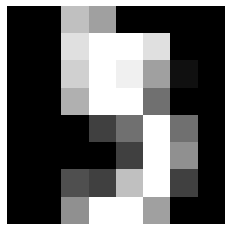

In [5]:
# 이미지로 보기 위해 matplotlib 라이브러리 추가
import matplotlib.pyplot as plt
%matplotlib inline 

plt.imshow(digits.data[5].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

### Label Data 지정하기

In [6]:
digits_label = digits.target

print(digits_label.shape)

(1797,)


### Target Names 출력해 보기

In [7]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### 데이터 Describe 해 보기

In [8]:
digits.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

## 4) train, test 데이터 분리

In [9]:
import pandas as pd

digits_df = pd.DataFrame(data=digits_data, columns=digits.feature_names)
digits_df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [10]:
# label 추가
digits_df["label"] = digits_label

digits_df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [11]:
X_train, X_test, y_train, y_test = train_test_split(digits_data, digits_label, 
                                                    test_size=0.2, random_state=77)

print('X_train 개수: ', len(X_train), ', X_test 개수: ', len(X_test))
print('y_train 개수: ', len(y_train), ', y_test 개수: ', len(y_test))

X_train 개수:  1437 , X_test 개수:  360
y_train 개수:  1437 , y_test 개수:  360


## 5) 다양한 모델로 학습시켜보기

### Decision Tree 사용해 보기

In [12]:
# Decision Tree 모델 
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=777)
print(decision_tree._estimator_type)

classifier


In [13]:
# 모델 학습
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=777)

In [14]:
# 예측과 정확도 확인 
from sklearn.metrics import accuracy_score
y_pred_dt = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_dt)
accuracy 

0.8611111111111112

### Random Forest 사용해 보기

In [15]:
# Random Forest 모델 
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=777)

# 학습 
random_forest.fit(X_train, y_train)

# 예측과 정확도 확인 
y_pred_rf = random_forest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)
accuracy 

0.9694444444444444

### SVM 사용해 보기

In [16]:
# SVM 모델 
from sklearn import svm
svm_model = svm.SVC()

# 학습
svm_model.fit(X_train, y_train)

# 예측과 정확도 확인 
y_pred_svm = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_svm)
accuracy

0.9944444444444445

### SGD Classifier 사용해 보기

In [17]:
# SGD Classifier 모델
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

# 학습 
sgd_model.fit(X_train, y_train)

# 예측과 정확도 확인 
y_pred_sgd = sgd_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_sgd)
accuracy

0.9472222222222222

### Logistic Regression 사용해 보기

In [18]:
# Logistic Regression 모델 
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

# 학습
logistic_model.fit(X_train, y_train)

# 예측과 정확도 확인 
y_pred_lr = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_lr)
accuracy 

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9611111111111111

## 6) 모델을 평가해 보기

In [19]:
#  Precision, Recall, F1 score 
# sklearn.metrics의 classification_report를 활용하여 각 지표를 한 번에 확인

# Decision Tree 모델
print("[ Decision Tree ]")
print(classification_report(y_test, y_pred_dt)) 

[ Decision Tree ]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        31
           1       0.84      0.90      0.87        48
           2       0.85      0.85      0.85        34
           3       0.85      0.83      0.84        35
           4       0.82      0.84      0.83        43
           5       0.94      0.94      0.94        32
           6       1.00      0.89      0.94        38
           7       0.83      0.92      0.88        38
           8       0.78      0.67      0.72        27
           9       0.76      0.76      0.76        34

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.86       360



In [20]:
# Random Forest 모델
print("[ Random Forest ]")
print(classification_report(y_test, y_pred_rf))

[ Random Forest ]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       1.00      0.98      0.99        48
           2       1.00      1.00      1.00        34
           3       0.92      0.97      0.94        35
           4       0.96      1.00      0.98        43
           5       0.97      0.97      0.97        32
           6       1.00      0.97      0.99        38
           7       0.95      0.97      0.96        38
           8       0.96      0.89      0.92        27
           9       0.94      0.94      0.94        34

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [21]:
# SVM 모델
print("[ SVM ]")
print(classification_report(y_test, y_pred_svm))

[ SVM ]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        48
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        35
           4       1.00      0.98      0.99        43
           5       1.00      1.00      1.00        32
           6       1.00      1.00      1.00        38
           7       1.00      1.00      1.00        38
           8       0.96      0.96      0.96        27
           9       0.97      1.00      0.99        34

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [22]:
# SGD Classifier 모델
print("[ SGD Classifier ]")
print(classification_report(y_test, y_pred_sgd)) 

[ SGD Classifier ]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.96      0.96      0.96        48
           2       1.00      1.00      1.00        34
           3       0.97      0.91      0.94        35
           4       0.95      0.98      0.97        43
           5       1.00      0.91      0.95        32
           6       0.93      0.97      0.95        38
           7       0.88      0.97      0.93        38
           8       0.91      0.78      0.84        27
           9       0.89      0.94      0.91        34

    accuracy                           0.95       360
   macro avg       0.95      0.94      0.94       360
weighted avg       0.95      0.95      0.95       360



In [23]:
# Logistic Regression 모델
print("[ Logistic Regression ]")
print(classification_report(y_test, y_pred_lr))

[ Logistic Regression ]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.92      0.92      0.92        48
           2       1.00      0.94      0.97        34
           3       0.97      0.97      0.97        35
           4       0.95      0.93      0.94        43
           5       0.97      0.97      0.97        32
           6       1.00      0.97      0.99        38
           7       0.95      0.97      0.96        38
           8       0.90      1.00      0.95        27
           9       0.97      1.00      0.99        34

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



손글씨 분류 문제는 데이터를 올바르게 판단하는 게 중요한 문제이기 때문에 평가 지표 중 accuracy가 중요합니다.

    Accuracy , 정확도 : (TP+TN) / (TP+TN+FP+FN)
    - 전체 데이터 중 올바르게 판단한 데이터 개수의 비율
    - Accuracy 값은 클수록 좋음

각 모델의 Accuracy는 
- Decision Tree : 0.86 
- Random Forest : 0.97 
- SVM : 0.99
- SGD Classifier : 0.95
- Logistic Regression : 0.96    

이므로 이 손글씨 분류 문제에는 SVM 모델이 가장 잘 예측한 것으로 볼 수 있습니다. 